In [13]:
from matplotlib import pyplot as plt
import numpy as np
from tqdm import tqdm
from collections import Counter
from scipy import stats


In [7]:
orgs = """plant	Arabidopsis_thaliana
plant	Oryza_sativa
plant	Zea_mays
fungi	Aspergillus nidulans
fungi	Saccharomyces cerevisiae
fungi	Penicilliopsis zonata
metazoa	Apis mellifera
metazoa	Caenorhabditis elegans
metazoa	Drosophila melanogaster
bacteria	Streptococcus_pneumoniae
bacteria	Escherichia coli
bacteria	Mycobacterium tuberculosis
bacteria	Chlorobaculum tepidum
protists	Plasmodium falciparum
protists	Dictyostelium_discoideum
protists	Tetrahymena_thermophila
vertebrates	Danio_rerio
vertebrates	Mus_musculus
vertebrates	Gallus_gallus
archaea	Ignisphaera_aggregans
archaea	Thermosphaera aggregans
archaea	Aeropyrum pernix
archaea	Thermoproteus_tenax
archaea	Nanoarchaeum equitans
archaea	Methanosarcina acetivorans
archaea	Halobacterium salinarum
archaea	Ignicoccus hospitalis
archaea	Candidatus Nitrosopelagicus
virus	Sars-Cov2
virus	Human_alphaherpesvirus 2
virus	Human papillomavirus 5""".split('\n')
orgs = [i.split('\t') for i in orgs]
orgs = [(a,b.replace(' ','_')) for a,b in orgs if a!='virus']
#set([b for a,b in orgs])^set(d)
vocabs = [f'tokenizer_models_and_vocabs/{v}_cds_tokenizer.vocab'
 for _,v in orgs]
seqs = [f'tokenized_sequences/{v}_cds_tokenized.txt' for _,v in orgs]


In [14]:
def compare_seqs(s1,s2):
    with open(s1,'r') as f:
        seq = f.read().replace('▁','').replace('.','')

    c1 = Counter(seq.split())

    with open(s2,'r') as f:
        seq = f.read().replace('▁','').replace('.','')

    c2 = Counter(seq.split())

    toks = list(set(c1)&set(c2))

    C1 = np.array([c1[t] for t in toks])
    C2 = np.array([c2[t] for t in toks])
    C1 = C1/sum(C1)
    C2 = C2/sum(C2)

    slope, intercept, r_value, p_value, std_err = stats.linregress(
                                -np.log(C1),-np.log(C2))
    ns = 'slope, intercept, r_value, p_value, std_err'.split(', ')
    return dict(zip(ns, [slope, intercept, r_value, p_value, std_err]))


O = np.zeros((len(seqs),len(seqs)))
O = [list(o) for o in O]
for k1, s1 in tqdm(enumerate(seqs),total=len(seqs)):
    for k2, s2 in enumerate(seqs):
        compdict = compare_seqs(s1,s2)
        O[k1][k2] = compdict

100%|█████████████████████████████████████████████████████████████████████████████████████████████| 28/28 [04:02<00:00,  8.65s/it]


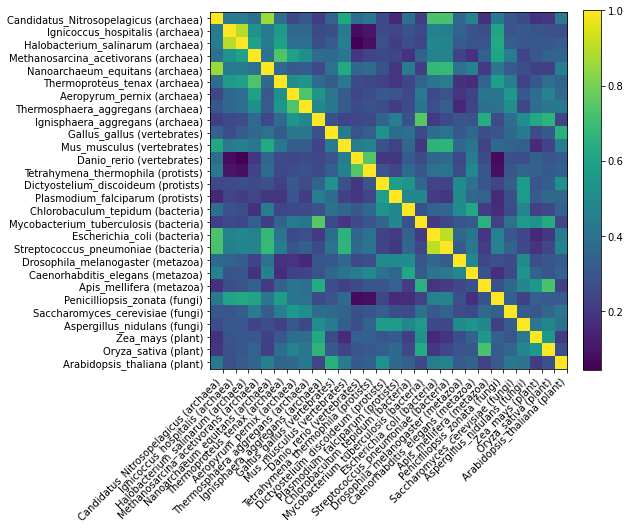

In [15]:
plt.figure(figsize=(7,7))
plt.imshow(np.array([[i['r_value'] for i in o] for o in O]))
plt.yticks(np.arange(0,len(seqs),1),[b+' ('+a+')' for a,b in orgs][::-1])
plt.xticks(np.arange(0,len(seqs),1)+.5,[b+' ('+a+')' for a,b in orgs][::-1],
           rotation=45,ha='right')
plt.colorbar(fraction=0.046, pad=0.04)
plt.show()

slope 0.47187640696351385
intercept -4.0771858989812895
r_value 0.4741083345995796
p_value 5.991330829420823e-164
std_err 0.016203192194323236


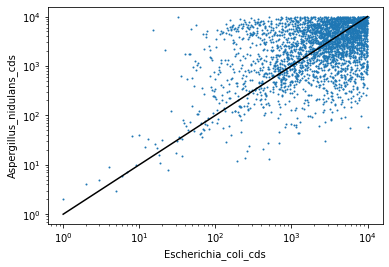

In [39]:
v1 = vocabs[10]
v2 = vocabs[3]

with open(vocabs[10],'r') as f:
    vocab1 = f.read().split('\n')
    vocab1 = [v.split('\t')[0].replace('▁','') for v in vocab1][3:]

with open(vocabs[3],'r') as f:
    vocab2 = f.read().split('\n')
    vocab2 = [v.split('\t')[0].replace('▁','') for v in vocab2][3:]
    
        
    
V = list(set(vocab1)&set(vocab2))
V1 = [vocab1.index(v)+1 for v in V]
V2 = [vocab2.index(v)+1 for v in V]
slope, intercept, r_value, p_value, std_err = stats.linregress(
                            -np.log(V1),-np.log(V2))
ns = 'slope, intercept, r_value, p_value, std_err'.split(', ')
for n,x in zip(ns, [slope, intercept, r_value, p_value, std_err]):
    print(n,x)
    
plt.scatter(V1,V2,s=1)
plt.xscale('log')
plt.yscale('log')
plt.xlabel(v1.split('/')[1].replace('_tokenizer.vocab',''))
plt.ylabel(v2.split('/')[1].replace('_tokenizer.vocab',''))
plt.plot([1,10**4],[1,10**4],c='black')
plt.show()